In [58]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1) Check Data

In [59]:
df = pd.read_csv("kickstarter_projects.csv")
df = df.drop(labels="Name",axis=1)
df['Year'] = pd.DatetimeIndex(df['Launched']).year
df.head(10)

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
0,1860890148,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009
1,709707365,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009
2,1703704063,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009
3,727286,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009
4,1622952265,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009
5,2089078683,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,2009
6,830477146,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,2009
7,266044220,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,2009
8,1502297238,Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled,2009
9,813230527,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,2009


In [60]:
df.isnull().sum()

ID             0
Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
Year           0
dtype: int64

In [61]:
df.describe()

,ID,Goal,Pledged,Backers,Year
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359,2014.241428
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520,1.931274
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000,2009.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000,2013.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000,2014.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000,2016.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000,2018.000000


In [62]:
categorical_df = df.iloc[:,1:4]
numerical_df = df.iloc[:,6:9]
numerical_df

,Goal,Pledged,Backers
0,1000,625,30
1,80000,22,3
2,20,35,3
3,99,145,25
4,1900,387,10
...,...,...,...
374848,500,0,0
374849,15000,269,8
374850,10000,165,3
374851,650,7,1


## 2.1) Successful Projects

#### 2.1.1) Country by year (Successful)

In [63]:
df_successfull=df[df["State"] == "Successful"]
df_successfull["Country"].value_counts()

print("Total successful attempts : ",end=" ")
print(df_successfull["Country"].value_counts().sum())

print("Total number of successful attempts by type : ")
print(df_successfull["Country"].value_counts())

Total successful attempts :  133851
Total number of successful attempts by type : 
United States     109299
United Kingdom     12067
Canada              4134
Australia           2010
Germany              937
France               908
Netherlands          617
Sweden               509
Spain                492
New Zealand          448
Italy                439
Mexico               396
Denmark              360
Hong Kong            216
Ireland              207
Switzerland          187
Singapore            178
Norway               162
Belgium              152
Austria              107
Luxembourg            19
Japan                  7
Name: Country, dtype: int64


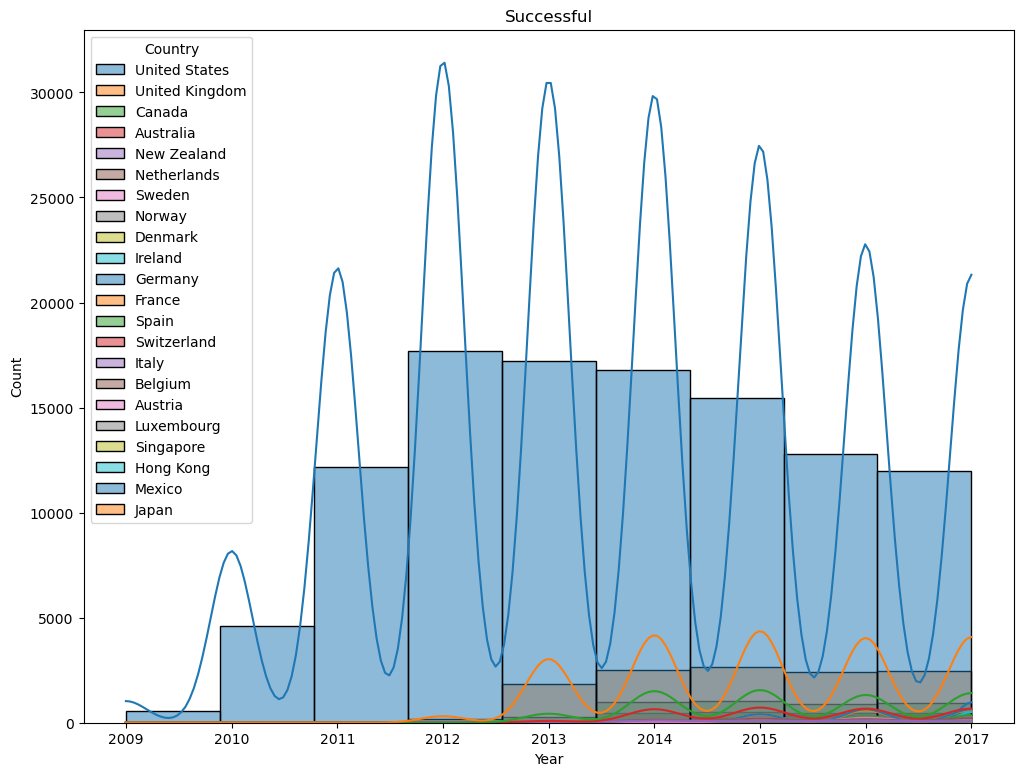

In [64]:
df_successfull=df[df["State"] == "Successful"]
df_successfull["Year"].value_counts()

plt.subplots(figsize=(12,9))
palette = sns.color_palette("tab10")
sns.histplot(data=df[df["State"] == "Successful"],x=df_successfull["Year"],bins=9,kde=True,hue="Country", palette=palette)
plt.title("Successful")
plt.show()

#### 2.1.2 ) Category by year (Successful)

In [65]:
df_successfull=df[df["State"] == "Successful"]
df_successfull["Category"].value_counts()

print("Total successful attempts : ",end=" ")
print(df_successfull["Category"].value_counts().sum())

print("Total number of successful attempts by type : ")
print(df_successfull["Category"].value_counts())

Total successful attempts :  133851
Total number of successful attempts by type : 
Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: Category, dtype: int64


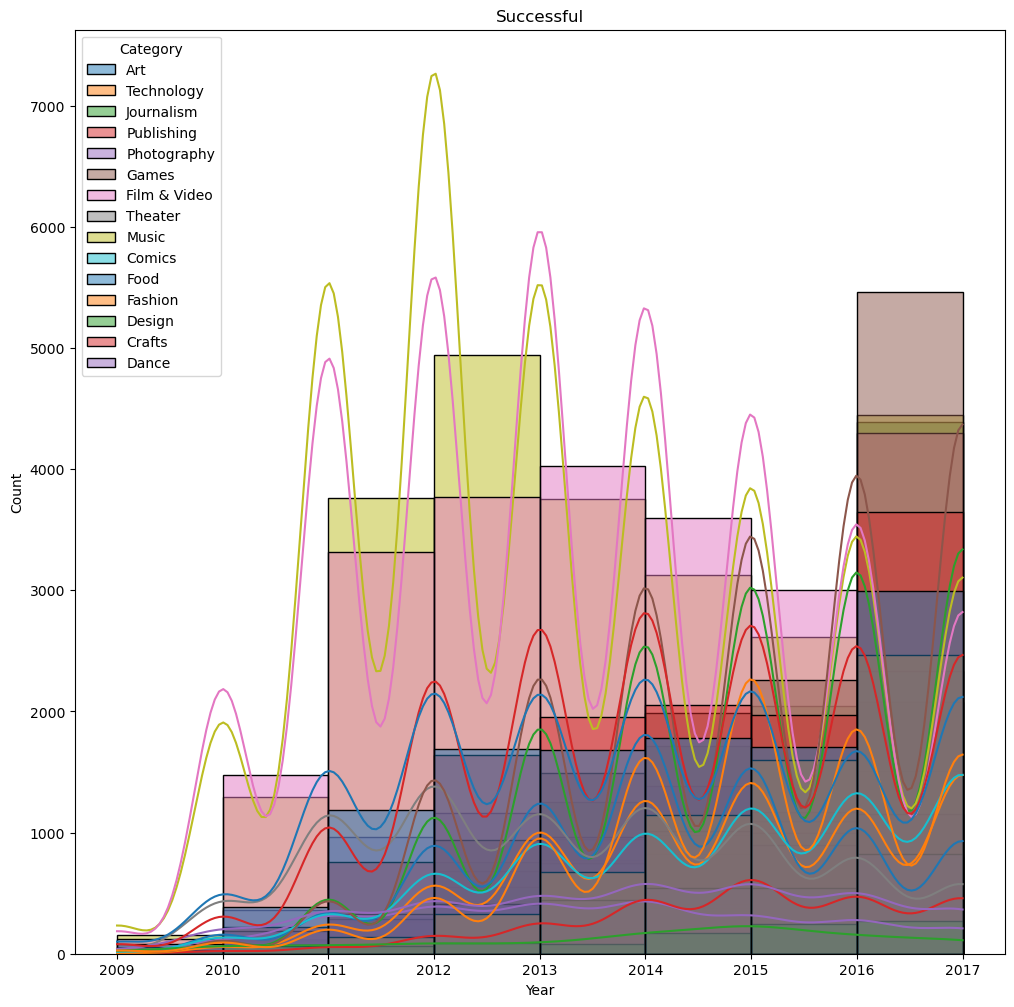

In [66]:
plt.subplots(figsize=(12,12))
palette = sns.color_palette("tab10")
sns.histplot(data=df[df["State"] == "Successful"],x=df_successfull["Year"],bins=30,kde=True,
             binwidth=1,hue="Category",palette=palette)
plt.title("Successful")
plt.show()

## 2.2) Failed Projects

#### 2.2.1) Country by year (Failed)

In [67]:
df_failed=df[df["State"] == "Failed"]
df_failed["Country"].value_counts()

print("Total failed attempts : ",end=" ")
print(df_failed["Country"].value_counts().sum())

print("Total number of failed attempts by type : ")
print(df_failed["Country"].value_counts())


Total failed attempts :  197611
Total number of failed attempts by type : 
United States     152059
United Kingdom     17386
Canada              8236
Australia           4606
Germany             2499
Italy               1930
Netherlands         1794
France              1612
Spain               1381
Mexico              1015
Sweden              1000
New Zealand          826
Denmark              566
Ireland              476
Switzerland          465
Norway               420
Austria              378
Belgium              371
Singapore            276
Hong Kong            261
Luxembourg            38
Japan                 16
Name: Country, dtype: int64


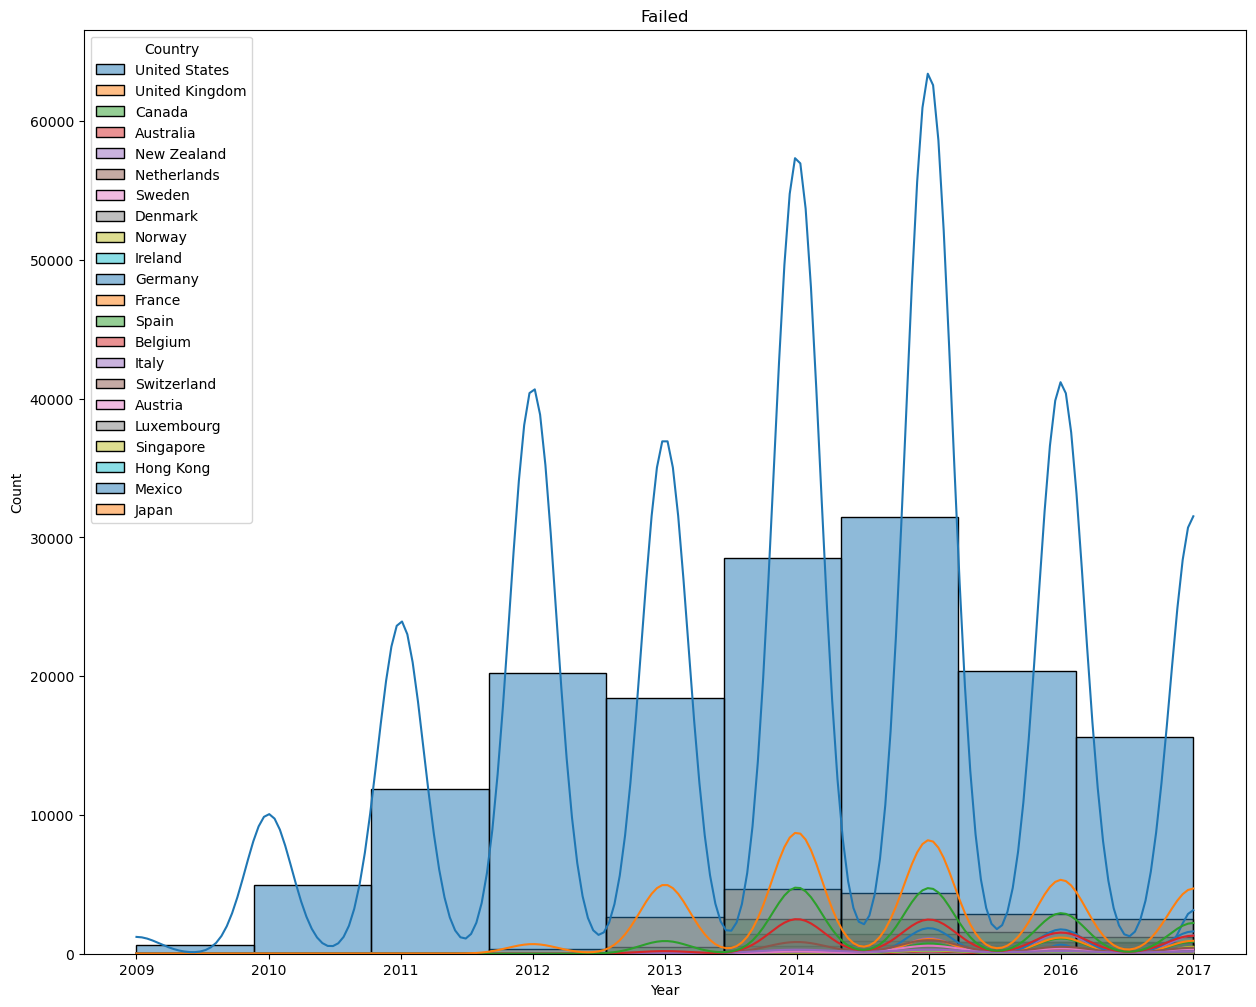

In [68]:
plt.subplots(figsize=(15,12))
palette = sns.color_palette("tab10")
sns.histplot(data=df[df["State"] == "Failed"],x=df_failed["Year"],bins=9,kde=True,hue="Country", palette=palette)
plt.title("Failed")
plt.show()

#### 2.2.2) Category by year (Failed)

In [69]:
df_failed=df[df["State"] == "Failed"]
df_failed["Category"].value_counts()

print("Total failed attempts : ",end=" ")
print(df_failed["Category"].value_counts().sum())

print("Total number of failed attempts by type : ")
print(df_failed["Category"].value_counts())

Total failed attempts :  197611
Total number of failed attempts by type : 
Film & Video    32891
Publishing      23113
Music           21696
Technology      20613
Games           16002
Food            15969
Design          14814
Fashion         14181
Art             14130
Photography      6384
Crafts           5703
Comics           4036
Theater          3708
Journalism       3136
Dance            1235
Name: Category, dtype: int64


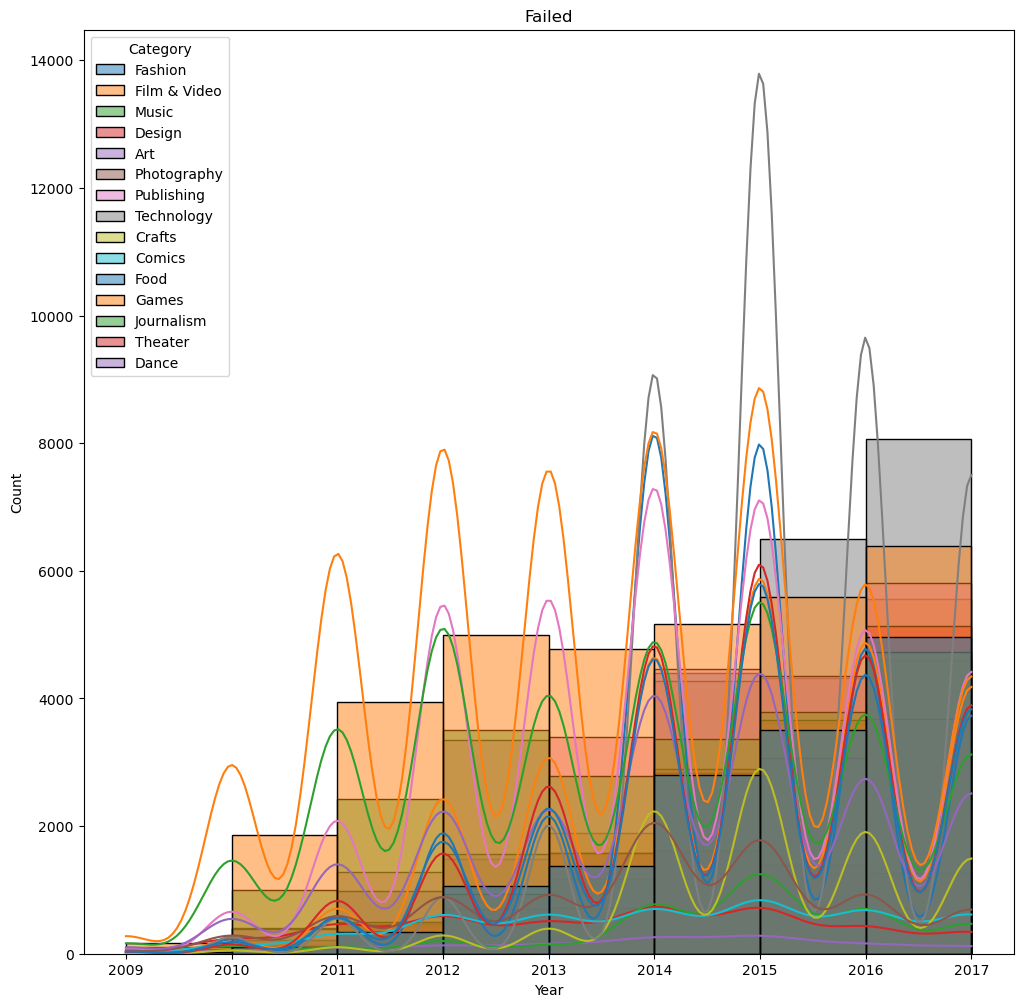

In [70]:
plt.subplots(figsize=(12,12))
palette = sns.color_palette("tab10")
sns.histplot(data=df[df["State"] == "Failed"],x=df_failed["Year"],bins=30,kde=True,
             binwidth=1,hue="Category",palette = palette)
plt.title("Failed")
plt.show()

## 3) Information

In [71]:
hero_df = df_successfull[df_successfull["Goal"] > df_successfull["Pledged"]]
hero_df


,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
258920,1769772834,Film & Video,Shorts,United States,2015-11-12 19:06:18,2015-12-27,36000,30716,275,Successful,2015
272350,780863434,Design,Product Design,Germany,2016-02-08 19:14:02,2016-03-19,27885,27765,90,Successful,2016


There are 2 startups that were successful even though they could not find enough investment.

### 3.2) Personal investment amount by country

In [72]:
grouped = df.groupby(by="Country").agg(sum).reset_index()
grouped["Per_person_mean"] = grouped["Pledged"] / grouped["Backers"]
grouped

,Country,ID,Goal,Pledged,Backers,Year,Per_person_mean
0,Australia,8406623223641,455510538,46737242,642816,15797558,72.707030
1,Austria,654372336669,26657489,9665787,65239,1203592,148.159644
2,Belgium,669478305763,23027796,4181551,33502,1243920,124.814966
3,Canada,15903022135651,655291039,91793533,1302563,29735475,70.471473
4,Denmark,1193940208904,39602061,7583273,77071,2243442,98.393339
5,France,3116143671008,238198264,34357482,350214,5925117,98.104251
6,Germany,4486053711497,313694283,39776273,410147,8408793,96.980529
7,Hong Kong,661125879615,14748961,10029485,84555,1246376,118.614925
8,Ireland,860862026719,38446236,4187257,46969,1634776,89.149375
9,Italy,3064518974409,226808793,16386010,155339,5802407,105.485487


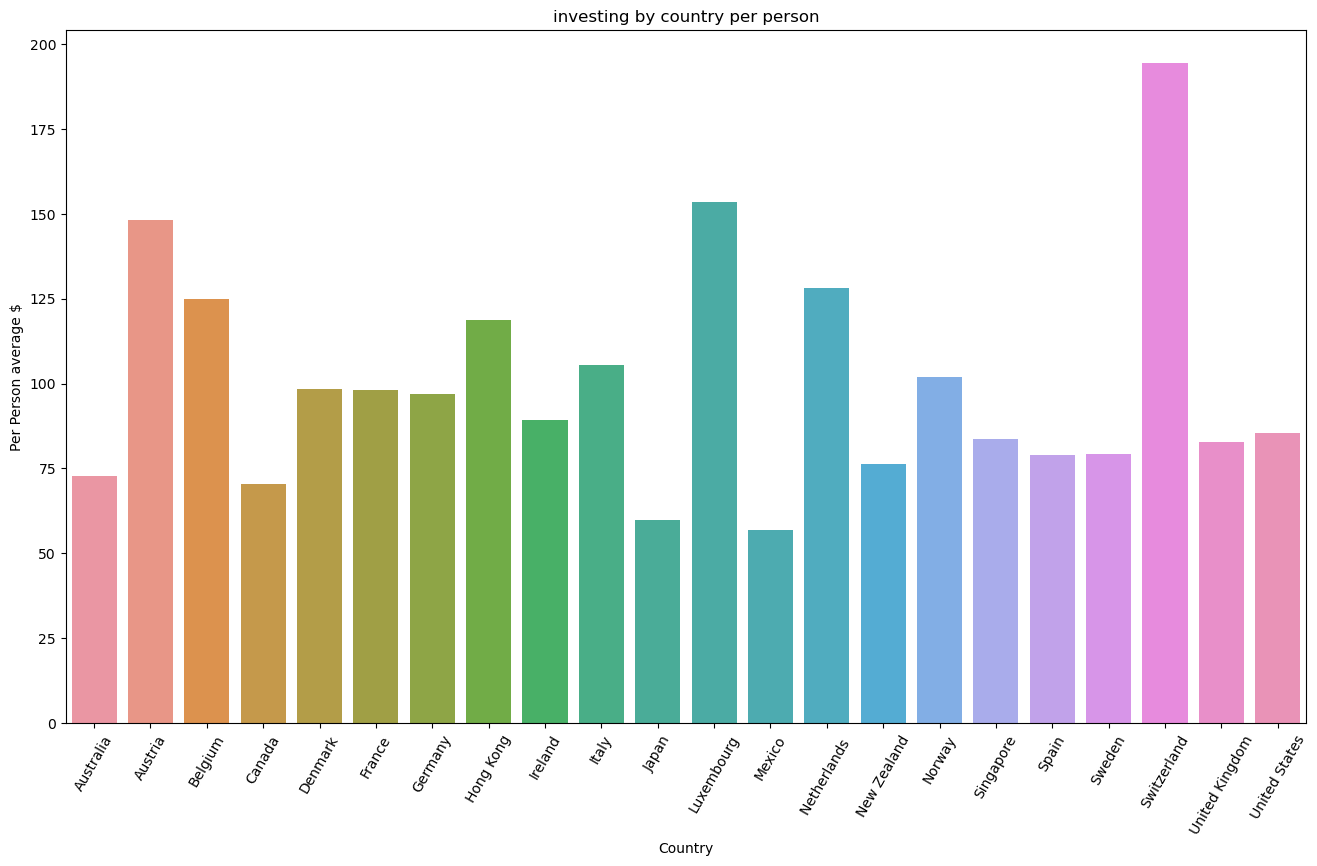

In [73]:
plt.subplots(figsize=(16,9))
plt.rcParams.update({'font.size': 10})
sns.barplot(data=grouped, x="Country",y="Per_person_mean")
plt.ylabel("Per Person average $")
plt.title("investing by country per person")
plt.xticks(rotation=60)
plt.show()

## 4) Create Model

#### Concat Fail and Successful 

In [74]:
df_failed=df[df["State"] == "Failed"]
df_failed.head()

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
0,1860890148,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009
1,709707365,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009
4,1622952265,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009
6,830477146,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,2009
9,813230527,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,2009


In [75]:
df_successfull=df[df["State"] == "Successful"]
df_successfull.head()

,ID,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Year
2,1703704063,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009
3,727286,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009
5,2089078683,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,2009
7,266044220,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,2009
10,469734648,Photography,Photography,United States,2009-04-29 06:43:44,2009-06-17,350,1630,31,Successful,2009


In [76]:
df2 = pd.concat([df_successfull,df_failed],axis=0)
df2.drop(columns=["ID","Launched","Deadline"],inplace=True)
df2.reset_index(inplace=True)

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2["State"] = le.fit_transform(df2["State"])

In [78]:
X = df2.drop(columns = ["State"], axis=1)
y = df2["State"]

In [79]:
num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [  
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler", numeric_transformer,num_features),
    ]
)


In [80]:
X = preprocessor.fit_transform(X)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state = 42)
X_train.shape, X_test.shape

((232023, 201), (99439, 201))

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [83]:
prediction = lr.predict(X_test)
accuracy = accuracy_score(y_test,prediction)
accuracy

0.900692887096612